# Analysis of Yelp Business Intelligence Data

# Installation and Initial Setup

In [1]:
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("seaborn==0.10.0")
sc.install_pypi_package("numpy==1.18.4")
sc.install_pypi_package("pyspark==2.4.5")
sc.install_pypi_package("ipython==7.14.0")
sc.install_pypi_package("subprocess.run==0.0.8")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1588749506472_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…




  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.5
    Not uninstalling numpy at /usr/local/lib64/python3.6/site-packages, outside environment /tmp/1588763152050-0
    Can't uninstall 'numpy'. No files were found to uninstall.

  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=90fe0fd4410ac3adab5c0b70b171181a6e11a64c71c9bff9bd490efea9ff3c61
  Stored in directory: /mnt/var/lib/livy/.cache/pip/wheels/84/30/e3/c51c5cd0229631e662d29d7b578a3e5949a4c8db033ffb70aa
Successfully built pyspark

  Created wheel for backcall: filename=backcall-0.1.0-py3-none-any.whl size=10413 sha256=2864e24d056bd9000f4469b1b0b14dbedeb74a92d667bb8f2d9c9210a3cd3535
  Stored in directory: /mnt/var/lib/livy/.cache/pip/wheels/b4/cb/f1/d142b3bb45d488612cf3943d8a1db090eb95e6687045ba61d1
Successfully built backcall

  Created wheel for subprocess.run: filename=subprocess.run-0.0.8-py3-none-any.whl size=5401 sha256=84463241d574ae21b286ffc8622cde1aab2

# Importing

In [ ]:
import os 
import sys
import logging
from subprocess import Popen, PIPE
from itertools import groupby 
from IPython import display 
import matplotlib as plt
import seaborn as sns
import numpy as np 
import pandas as pd

In [2]:
import pyspark
from pyspark import *
import pyspark.ml
from pyspark.ml import *
from pyspark.ml.feature import VectorAssembler, Normalizer, StandardScaler, PCA
__all__ = ['Binarizer',
           'BucketedRandomProjectionLSH', 'BucketedRandomProjectionLSHModel',
           'Bucketizer',
           'ChiSqSelector', 'ChiSqSelectorModel',
           'CountVectorizer', 'CountVectorizerModel',
           'DCT',
           'ElementwiseProduct',
           'HashingTF',
           'IDF', 'IDFModel',
           'Imputer', 'ImputerModel',
           'IndexToString',
           'MaxAbsScaler', 'MaxAbsScalerModel',
           'MinHashLSH', 'MinHashLSHModel',
           'MinMaxScaler', 'MinMaxScalerModel',
           'NGram',
           'Normalizer',
           'OneHotEncoder',
           'PCA', 'PCAModel',
           'PolynomialExpansion',
           'QuantileDiscretizer',
           'RegexTokenizer',
           'RFormula', 'RFormulaModel',
           'SQLTransformer',
           'StandardScaler', 'StandardScalerModel',
           'StopWordsRemover',
           'StringIndexer', 'StringIndexerModel',
           'Tokenizer',
           'VectorAssembler',
           'VectorIndexer', 'VectorIndexerModel',
           'VectorSlicer',
           'Word2Vec', 'Word2VecModel']


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
from pyspark.sql import SQLContext
from pyspark import SparkContext
sc =SparkContext()
sqlContext = SQLContext(sc)


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession\
        .builder\
        .appName("YelpData")\
        .getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
from pyspark.sql import Window, Row, SQLContext

from pyspark.sql import functions as F 
from pyspark.sql.functions import lit, udf, struct, countDistinct, collect_list, avg, count, col

from pyspark.sql.types import *
from pyspark.sql.types import ArrayType, BooleanType, LongType, FloatType, IntegerType 


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
backcall                   0.1.0
beautifulsoup4             4.8.1
boto                       2.49.0
cycler                     0.10.0
decorator                  4.4.2
ipython                    7.14.0
ipython-genutils           0.2.0
jedi                       0.17.0
jmespath                   0.9.4
kiwisolver                 1.2.0
lxml                       4.4.2
matplotlib                 3.2.1
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.18.4
pandas                     1.0.3
parso                      0.7.0
pexpect                    4.8.0
pickleshare                0.7.5
pip                        20.1
prompt-toolkit             3.0.5
ptyprocess                 0.6.0
py-dateutil                2.2
py4j                       0.10.7
Pygments                   2.6.1
pyparsing                  2.4.7
pyspark                    2.4.5
pyt

# Loading Data

In [7]:
business = spark.read.json("s3://my-little-pony/yelp/yelp_academic_dataset_business.json")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Overview of Data

In [8]:
iv = {'rows': len(business.columns), 'columns': business.count()}
print(f"Columns:{iv['columns']} | Rows:{iv['rows']}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns:209393 | Rows:14

In [9]:
business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

# Analyzing Categories
Let's now answer this question: how many unique categories are represented in this dataset?

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

How many businesses are categorized as Active Life, for instance
What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [10]:
OneSlice = business.select("business_id", "name", "city", "state", "categories")
OneSlice.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories
Let's now answer this question: how many unique categories are represented in this dataset?

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

How many businesses are categorized as Active Life, for instance
What are the top 20 most popular categories available?


### *1- Association Table*
We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

In [11]:
import pyspark.sql.functions as F
TwoSlice = OneSlice.select("business_id", F.posexplode(F.split("categories", ",")).alias("X", "category")).drop('X')
TwoSlice.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|            category|
+--------------------+--------------------+
|f9NumwFMBDn751xgF...|         Active Life|
|f9NumwFMBDn751xgF...|    Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|         Guns & Ammo|
|f9NumwFMBDn751xgF...|            Shopping|
|Yzvjg0SayhoZgCljU...|    Health & Medical|
|Yzvjg0SayhoZgCljU...| Fitness & Instru...|
|Yzvjg0SayhoZgCljU...|                Yoga|
|Yzvjg0SayhoZgCljU...|         Active Life|
|Yzvjg0SayhoZgCljU...|             Pilates|
|XNoUzKckATkOD1hP6...|                Pets|
|XNoUzKckATkOD1hP6...|        Pet Services|
|XNoUzKckATkOD1hP6...|        Pet Groomers|
|6OAZjbxqM5ol29BuH...|     Hardware Stores|
|6OAZjbxqM5ol29BuH...|       Home Services|
|6OAZjbxqM5ol29BuH...|   Building Supplies|
|6OAZjbxqM5ol29BuH...|       Home & Garden|
|6OAZjbxqM5ol29BuH...|            Shopping|
|51M2Kk903DFYI6gnB...|       Home Services|
|51M2Kk903DFYI6gnB...|            Plumbing|
|51M2Kk903DFYI6gnB...|        El

# Total Unique Categories
what is the total number of unique categories available?

In [12]:
ThreeSlice= TwoSlice.select("category").groupby("category").count()
ThreeSlice.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|    Furniture Stores| 1780|
|      Dermatologists|   70|
|              Korean|  712|
| Boudoir Photography|   62|
|    Hot Air Balloons|    6|
| Beach Equipment ...|    7|
|    Historical Tours|   10|
|      Paddleboarding|    7|
| Mobile Home Dealers|    3|
|               Tires| 2020|
|  Car Window Tinting|  243|
|       Skating Rinks|   39|
|              Fondue|   14|
|       Data Recovery|   32|
|   Pet Waste Removal|    5|
|    Historical Tours|   44|
| Commercial Truck...|   93|
|       Videographers|   36|
|               Hakka|   44|
|       Live/Raw Food|   69|
+--------------------+-----+
only showing top 20 rows

In [13]:
uniq = ThreeSlice.count()
print(f"Total Unique Categories: {uniq}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Unique Categories: 2528

# Top Categories By Business

In [16]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

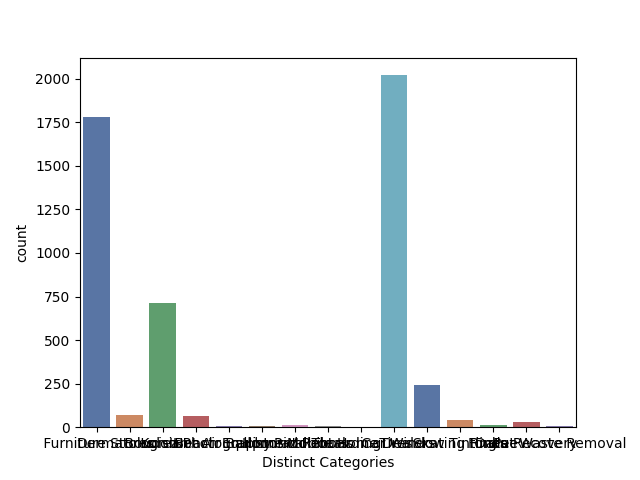

In [17]:
pdf = ThreeSlice.toPandas().head(15)
sns.barplot(x="category", y="count", palette="deep", data=pdf)
plt.xlabel("Distinct Categories")
%matplot plt

In [21]:
Cat = ThreeSlice.select("category").head(3)
print(f"Top Three Categories: {Cat}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Top Three Categories: [Row(category=' Furniture Stores'), Row(category='Dermatologists'), Row(category=' Korean')]

# Do Yelp Reviews Skew Negative?
Oftentimes, it is said that the only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received.

How true is this really? Let's try and answer this question.

Loading User Data
Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [ ]:
rf = spark.read.json('s3://my-little-pony/yelp/reviews.json')

In [23]:
rf.printSchema()
rf.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|-MhfebM0QIsKt87iD...|   0|2015-04-15 05:21:16|    0|xQY8N_XvtGbearJ5X...|  2.0|As someone who ha...|     5|OwjRMXRC0KyPrIlcj...|
|lbrU8StCq3yDfr-QM...|   0|2013-12-07 03:16:52|    1|UmFMZ8PyXZTY2Qcwz...|  1.0|I am actually hor...|     1|nIJD_7ZXHq-FX8byP...|
|HQl28K

In [117]:
rdf = rf.select("business_id", "stars")

rdf.createOrReplaceTempView("A1")
A1 = spark.sql(
"""
SELECT business_id, avg(stars) AS r_avgstars
FROM A1
GROUP BY business_id
""")

BB = business.select("business_id", "stars")
BB.createOrReplaceTempView("biz")
A2 = spark.sql(
"""
SELECT business_id, avg(stars) AS b_avgstars
FROM biz
GROUP BY business_id
""")

A1.describe("r_avgstars").show()
A2.describe("b_avgstars").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|        r_avgstars|
+-------+------------------+
|  count|            209393|
|   mean|3.5343042366202684|
| stddev|1.0152088475168217|
|    min|               1.0|
|    max|               5.0|
+-------+------------------+

+-------+------------------+
|summary|        b_avgstars|
+-------+------------------+
|  count|            209393|
|   mean|3.5380552358483808|
| stddev| 1.023543034622586|
|    min|               1.0|
|    max|               5.0|
+-------+------------------+

# Should the Elite be Trusted? 
For the final portion - you have a choice:

Try and analyze some interesting dimension to this data. The ONLY requirement is that you must use the Users dataset and join on either the business* or reviews** dataset
Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.
Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

In [42]:
df = spark.read.json("s3://my-little-pony/yelp/yelp_academic_dataset_user.json")
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [108]:
BigFans = df.createOrReplaceTempView("elitesOnly")
BF = spark.sql(
"""
SELECT elite, useful,average_stars 
FROM elitesOnly
WHERE fans>=100
LIMIT 30
""").orderBy("fans", ascending=False)

LittleFans = df.createOrReplaceTempView("elitesOnly")
LF = spark.sql(
"""
SELECT elite, fans, cool, average_stars 
FROM elitesOnly
WHERE fans<=100
LIMIT 30
""").orderBy("fans", ascending=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

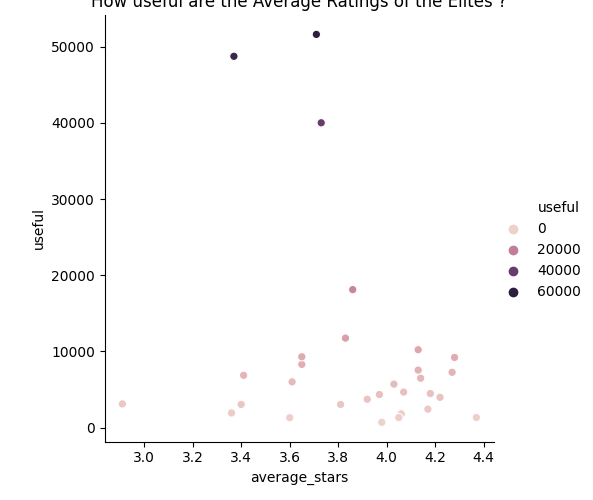

In [114]:
search = BF.groupby("useful", "average_stars").count().orderBy("average_stars", ascending=False)
search.show()

v= search.toPandas()
sns.relplot(x="average_stars", y="useful", hue= "useful", data=v)
plt.title(f"How useful are the Average Ratings of the Elites ?")

%matplot plt